In [1]:
#In this also again I did the all 1st three part ie, feature selection, feature engineering and seperating categorical
#varibales, but in this prediction part the data on which i am did these operations is titanic_test.csv.
#because the prediction data should be same as of the data used for training.

#In this code snippet i used the already created model TitanicSurvialPrediction.pk1 for making predictions.
#again for this i have used joblib to load the data nd make predictions.

In [2]:
! ls

Feature Engineering Cont...ipynb  TitanicSurvivalPrediction.pk1
Titanic Prediction Model.ipynb    titanic_test.csv
Titanic Survival Prediction.ipynb titanic_train.csv


In [3]:
import pandas as pd
datatest = pd.read_csv("titanic_test.csv")

In [4]:
datatest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
datatest.drop(["Name","Ticket","Fare","Cabin"], axis=1, inplace=True)

In [6]:
datatest.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
5,897,3,male,14.0,0,0,S
6,898,3,female,30.0,0,0,Q
7,899,2,male,26.0,1,1,S
8,900,3,female,18.0,0,0,C
9,901,3,male,21.0,2,0,S


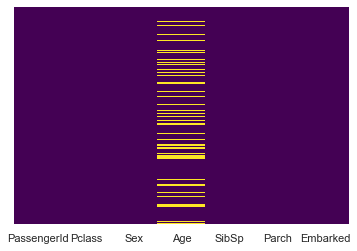

In [7]:
import seaborn as sns
sns.set()
sns.heatmap(datatest.isnull(), cbar=False, yticklabels=False, cmap="viridis")

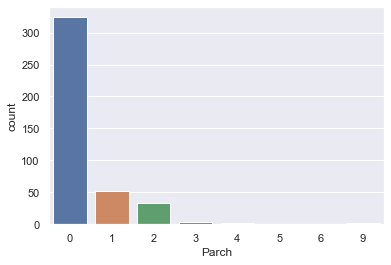

In [8]:
sns.countplot(datatest["Parch"])

In [9]:
def fill(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age
    
    
datatest["Age"] = datatest[["Age","Pclass"]].apply(fill, axis=1)

In [10]:
Age = datatest["Age"]

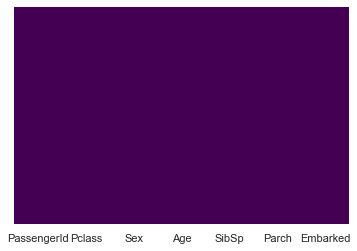

In [11]:
sns.heatmap(datatest.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [12]:
Pclass = pd.get_dummies(datatest["Pclass"], drop_first= True)
Sex = pd.get_dummies(datatest["Sex"], drop_first=True)
SibSp = pd.get_dummies(datatest["SibSp"], drop_first=True)
Parch = pd.get_dummies( datatest["Parch"],drop_first=True)
Embarked = pd.get_dummies(datatest["Embarked"], drop_first=True)

In [13]:
X = pd.concat([Age, Pclass, Sex, SibSp, Parch, Embarked], axis=1)

In [14]:
X

,Age,2,3,male,1,2,3,4,5,8,1,2,3,4,5,6,9,Q,S
0,34.5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,47.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,62.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,27.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,25.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
414,39.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,38.5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,25.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
datatest.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [17]:
#Now importing joblib for loading the created model and making prediction using that

from sklearn.externals import joblib
model = joblib.load("TitanicSurvivalPrediction.pk1")
model.predict(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,

In [ ]:
#The data predicted can verified from Kaggel by providing your output there because the data was taken from Kaggle.